Fake News Detetion
~ Mansi


### Data Preprocessing and Cleaning

In [1]:
!gdown 17is0U3amgrYFifRROyl36KnHAiwzrwAx

Downloading...
From: https://drive.google.com/uc?id=17is0U3amgrYFifRROyl36KnHAiwzrwAx
To: /content/fake-news.zip
100% 48.7M/48.7M [00:01<00:00, 35.6MB/s]


In [2]:
!unzip fake-news.zip


Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [4]:

# Import dataset
df=pd.read_csv('fake-news/train.csv') #change the path as colab

# Get the shape
df.shape
df = df.iloc[:10000]

In [5]:
df.shape

(10000, 5)

In [6]:
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


* ‘1’ for FAKE NEWS
* ‘0’ for RELIABLE article

In [7]:
# Change the labels
df.loc[(df['label'] == 1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 0) , ['label']] = 'REAL'


In [8]:
# Isolate the labels
labels = df.label
labels.head()


0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [9]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'].values.astype('str'), labels, test_size=0.2, random_state=7)

We shall now declare a TfidfVectorizer using stop words from the English language (depends on the language of the articles) and we will allow up to a document frequency of 0.7 (for more information you can visit the TfidfVectorizer documentation here


In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit & transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


The PassiveAggressiveClassifier it to now be initialized. In order to incorporate it into our model, we are going to use the “y_train” and “tfidf_train”.

In [11]:
# Initialize the PassiveAggressiveClassifier and fit training sets
pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
y_pred=pa_classifier.predict(tfidf_test) 
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.7%


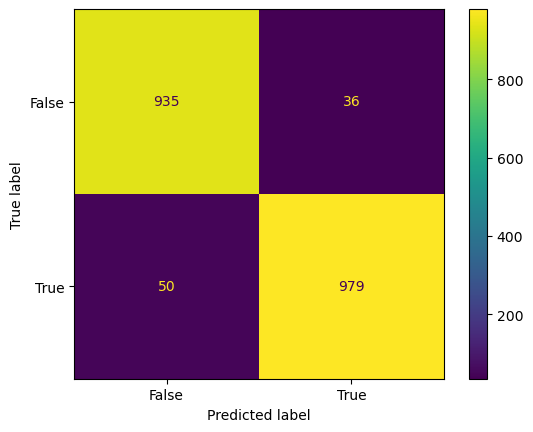

In [15]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [13]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[935,  36],
       [ 50, 979]], dtype=int64)